<h2>Double Pendulum Problem</h2>

This notebook is created to animate the motion of double pendulums using the equation (11.37) and (11.38) of Taylor classical mechanics. From the Taylor solution, we have

    potential energy: U(θ1,θ2) = (m1+m2)*g*L1*(1-cosθ1) + m2*g*L2*(1-cosθ2)
    
    kinetic energy: T = 0.5*(m1+m2)*L1*L1*θ1' + m2*L1*L2*θ1'*θ2'*cos(θ1-θ2) + 0.5*m2*L2*L2*θ1'*θ1'
    
By T - U, we can get the Lagrangian:

    L = 0.5*(m1+m2)*L1*L1*θ1' + m2*L1*L2*θ1'*θ2'*cos(θ1-θ2) + 0.5*m2*L2*L2*θ1'*θ1' - (m1+m2)*g*L1*(1-cosθ1) - 
    
    m2*g*L2*(1-cosθ2)

By taking the derivatives of each term, we can get the Larange Equations:
    
    (m1+m2)*L1*θ1'' + m2*L2*θ2''*cos(θ1-θ2) + m2*L2*θ2'*θ2'*sin(θ1-θ2) + (m1 + m2)*g*sin(θ1) = 0   Eq(1)
    
    L2*θ2'' + L1θ1''*cos(θ1-θ2) - L1θ1'*θ1'*sin(θ1-θ2) + g*sinθ2 = 0                               Eq(2)
    

Solve this quadratic equation to get expressions for θ2'' and θ1'' independently and put the right side of the equation into dy_dt funtion of my double pendulum class, I have the result shown in the plot. 

In [25]:
# import the modulus needed
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos

from scipy.integrate import solve_ivp

In [26]:
fontsize=15

<h3>Part(a): Python class of Double Pendulum</h3>

In [27]:
class double_Pendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
    double pendulums (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of the first pendulum
    mass2 : float
        mass of the second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vectors y1 and y2, 
        given time t and the corresponding values of y1 and y2.
    """

    def __init__(self, L1=1., m1=1., L2=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of two diffeqs: 
        [dphi1_dt, d^2phi1_dt^2, dphi2_dt, d^2phi2_dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = dphi1/dt, y[2] = phi_2(t), and y[3]=dphi2/dt
            
        Returns
        -------
        dy_dx: float
            A 4-component vector with dy_dx[0] = dphi1_dt, dy_dx[1]=d^2phi1_dt^2,
                                        dy_dx[2]= dphi2_dt, dy_dx[3]=d^2phi2_dt^2]
        
        """
        
        m1 = self.m1
        m2 = self.m2
        L1 = self.L1
        L2 = self.L2
        g = self.g
        
        dy_dx = np.zeros_like(y)
        dy_dx[0] = y[1]
        del_1 = y[2] - y[0]
        den1 = (m1 + m2)*L1 - m2*L1*np.cos(del_1)*np.cos(del_1)
        # equation 1 calculated from Lagrangian
        dy_dx[1] = (m2*L1*y[1]*y[1]*np.sin(del_1)*np.cos(del_1) +
               m2*g*np.sin(y[2])*np.cos(del_1) +
               m2*L2*y[3]*y[3]*np.sin(del_1) -
               (m1 + m2)*g*sin(y[0]))/den1
        
        dy_dx[2] = y[3]
        den2 = (L2/L1)*den1
        # equation 2 calculated from Lagrangian
        dy_dx[3] = (-m2*L2*y[3]*y[3]*np.sin(del_1)*np.cos(del_1) +
               (m1 + m2)*g*np.sin(y[0])*np.cos(del_1) -
               (m1 + m2)*L1*y[1]*y[1]*np.sin(del_1) -
               (m1 + m2)*g*np.sin(y[2]))/den2
        
        return dy_dx

    def solve_ode(self, t_pts, phi_1_0=np.pi/2, phi_1_dot_0=0., phi_2_0=np.pi, phi_2_dot_0=0.,
                  abserr=1.0e-11, relerr=1.0e-11):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        return phi_1, phi_1_dot, phi_2, phi_2_dot

Text(0, 0.5, 'θ (rad)')

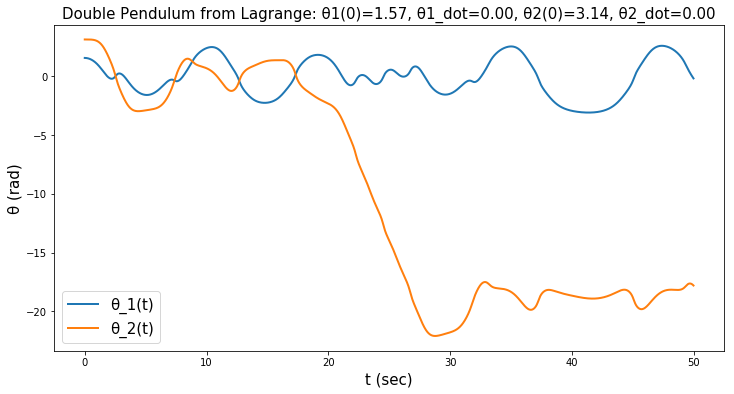

In [28]:
# basic output to check the results
p1 = double_Pendulum()
t_pts = np.arange(0, 50, 0.01)
phi_1_0=np.pi/2
phi_1_dot_0=0.
phi_2_0=np.pi
phi_2_dot_0=0.

phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)

plt.figure(figsize=(12,6))
plt.title(r'Double Pendulum from Lagrange: θ1(0)=1.57, θ1_dot=0.00, θ2(0)=3.14, θ2_dot=0.00', fontsize=fontsize)
plt.plot(t_pts, phi_1, linewidth=2.0, label='θ_1(t)')
plt.plot(t_pts, phi_2, linewidth=2.0, label='θ_2(t)')
plt.legend(fontsize=fontsize)
plt.xlabel(r't (sec)', fontsize=fontsize)
plt.ylabel(r'θ (rad)', fontsize=fontsize)

<h3>Part (b) Chaotic System</h3>

I made small changes on the initial condition for both pendulums. Then I plotted ΔΘ1(t)=|Θ1-Θ1'| and ΔΘ2(t)=|Θ2-Θ2'| to see chaotic at large angle. 

In [29]:
# basic output to check the results
p1 = double_Pendulum()
t_pts = np.arange(0, 200, 0.01)
phi_1_0=np.pi/2
phi_1_dot_0=0.
phi_2_0=np.pi
phi_2_dot_0=0.

phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)

phi_1_2, phi_1_dot_2, phi_2_2, phi_2_dot_2 = p1.solve_ode(t_pts, phi_1_0=phi_1_0+0.01, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0+0.01, phi_2_dot_0=phi_2_dot_0)

delta_phi_1 = np.abs(phi_1_2 - phi_1)
delta_phi_2 = np.abs(phi_2_2 - phi_2)

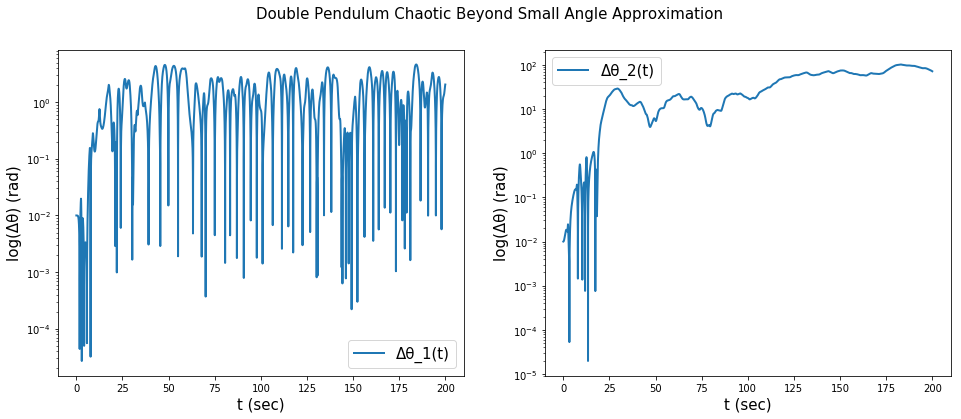

In [30]:
# plot our delta_phi to see the chaos
plt.figure(figsize=(16,6))
plt.suptitle(r'Double Pendulum Chaotic Beyond Small Angle Approximation', fontsize=fontsize)
plt.subplot(1,2,1)
plt.semilogy(t_pts, delta_phi_1, linewidth=2.0, label='Δθ_1(t)')
plt.xlabel(r't (sec)', fontsize=fontsize)
plt.ylabel(r'log(Δθ) (rad)', fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.subplot(1,2,2)
plt.semilogy(t_pts, delta_phi_2, linewidth=2.0, label='Δθ_2(t)')
plt.xlabel(r't (sec)', fontsize=fontsize)
plt.ylabel(r'log(Δθ) (rad)', fontsize=fontsize)
plt.legend(fontsize=fontsize)

I plot two Δθ onto the same plot below and show the time period from 0 to 25 sec (The system stops overlapping after t = 25 sec). 

(0, 25)

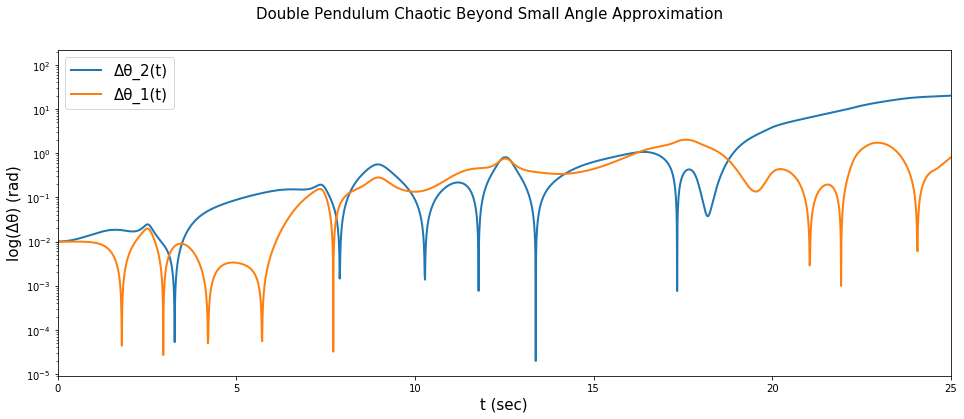

In [31]:
# plot our delta_phi to see the chaos
plt.figure(figsize=(16,6))
plt.suptitle(r'Double Pendulum Chaotic Beyond Small Angle Approximation', fontsize=fontsize)
plt.semilogy(t_pts, delta_phi_2, linewidth=2.0, label='Δθ_2(t)')
plt.semilogy(t_pts, delta_phi_1, linewidth=2.0, label='Δθ_1(t)')
plt.xlabel(r't (sec)', fontsize=fontsize)
plt.ylabel(r'log(Δθ) (rad)', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlim(0, 25)

<h3>Part (c): Markdown Documentation</h3>

See the above documentation of the explanations for this question and its solution. 

<h3>Part (d): Three Pendulum Simulation</h3>

see the other notebook called Triple Pendulum System for this part.  

<h3>Part (e): Widgets to control the simulation/animation</h3>

In [32]:
# Import explicitly the widgets we might use (add more as needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display


In [33]:
def my_function(t, L1=1., m1=1., L2=1., m2=1., g=1.):
    """function for double pendulumn"""
    p1 = double_Pendulum(L1=L1, m1=m1, L2=L2, m2=m2, g=g)
    phi_1_0=np.pi/2
    phi_1_dot_0=0.
    phi_2_0=np.pi
    phi_2_dot_0=0.
    phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)
    
    return phi_1, phi_1_dot, phi_2, phi_2_dot
    

def update_plot(m2=1.0):
    """
    Update the plot, which includes a call to a function.
    """
    t_min = 0.
    t_max = 2. * np.pi
    num_t = 200
    t_pts = np.linspace(t_min, t_max, num_t)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    phi_1, phi_1_dot, phi_2, phi_2_dot = my_function(t_pts, m2=m2)
    line, = ax.plot(t_pts, phi_1,
                    lw=2, color='blue')
    line, = ax.plot(t_pts, phi_2,
                    lw=2, color='red')

In [34]:
m2 = FloatSlider(value=1.0, min=0.1, max=10., step=0.1,
                      description=r'$m_2$ :')

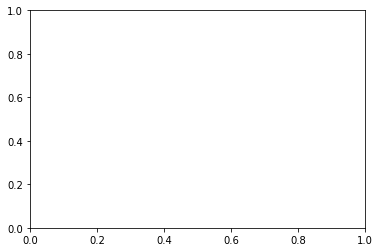

In [35]:
plot_out = widgets.interactive_output(update_plot,
                                      dict(
                                      m2=m2,
                                      )
                                     )
UI_box = VBox([m2, plot_out])
display(UI_box) 